,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Date        2274 non-null   object 
 2   Open        2274 non-null   float64
 3   High        2274 non-null   float64
 4   Low         2274 non-null   float64
 5   Close       2274 non-null   float64
 6   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 124.5+ KB
Missing values per column:
Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64
        Unnamed: 0         Open         High          Low        Close  \
count  2274.000000  2274.000000  2274.000000  2274.000000  2274.000000   
mean   1136.500000   103.493730   105.771617   101.036327   103.461794   
std     656.591578   111.136174   113.606095   108.399966   111.032019   
min       0.0

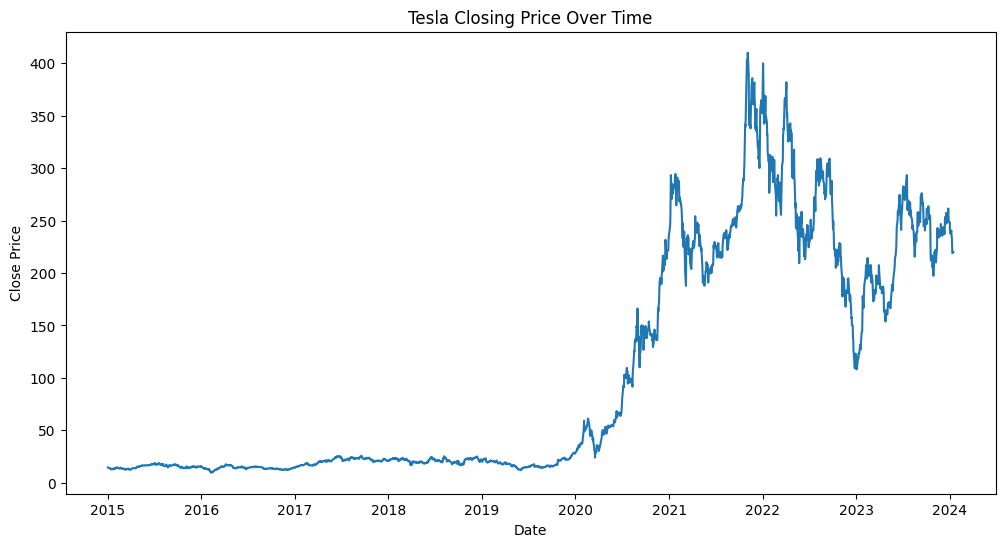

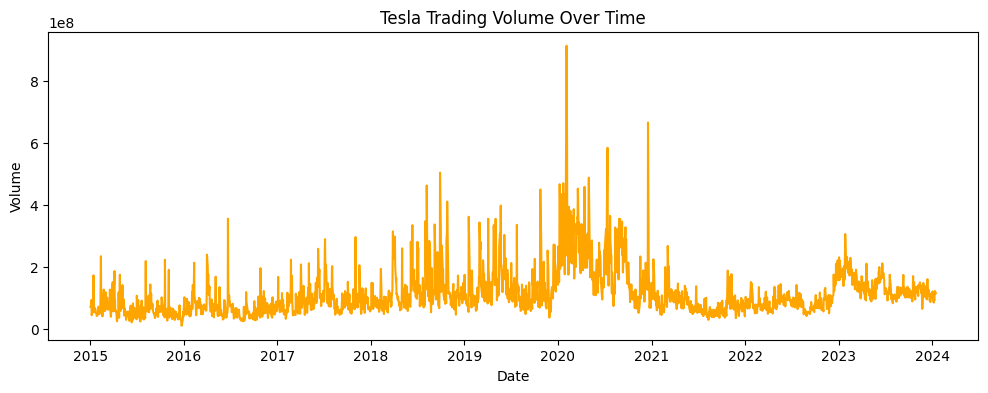

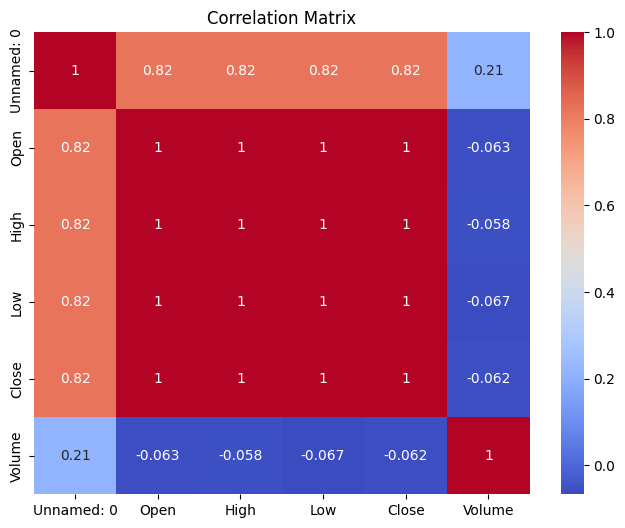

Missing values per column after cleaning:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


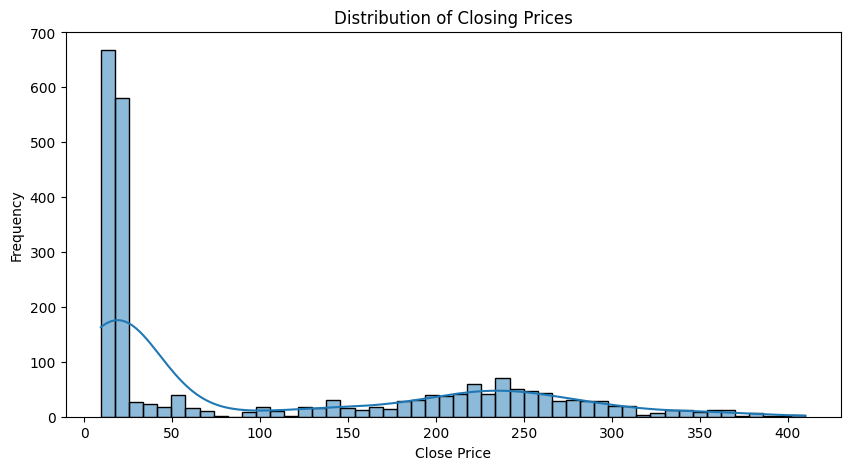

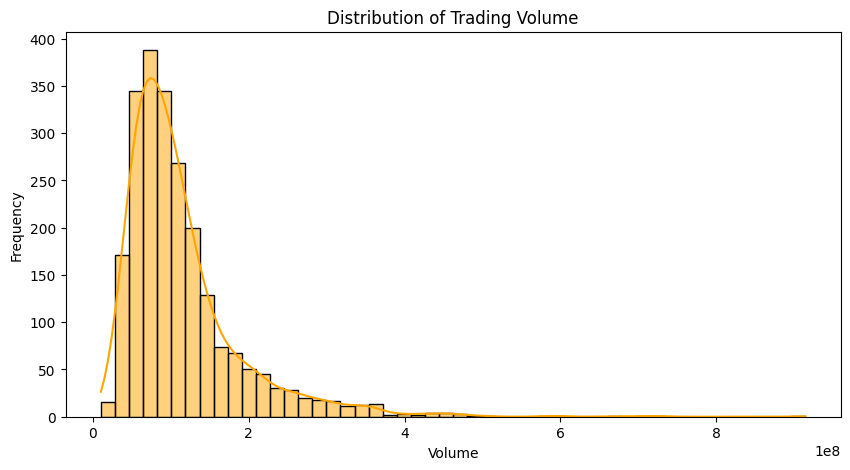

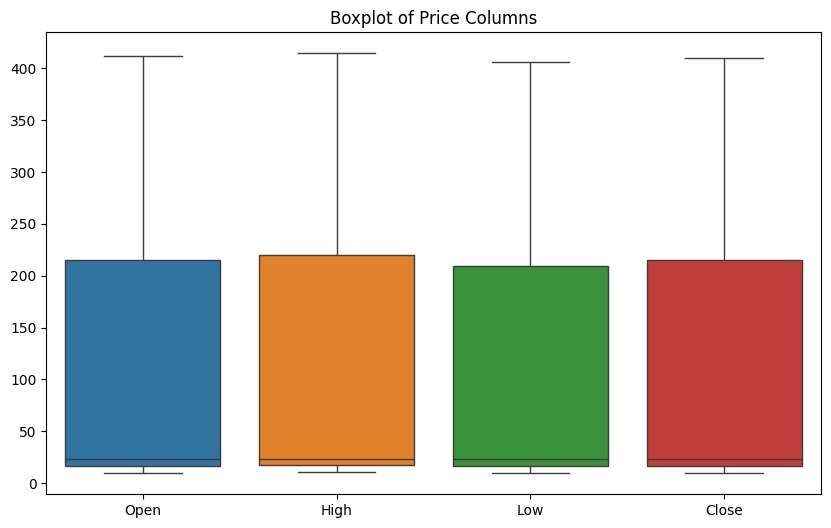

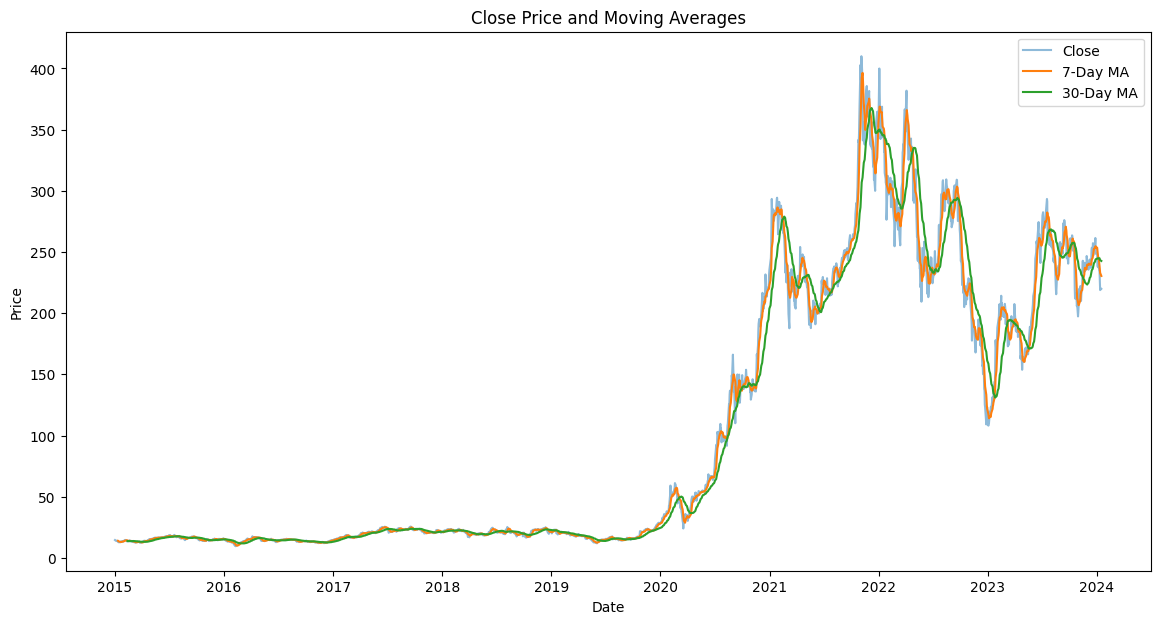

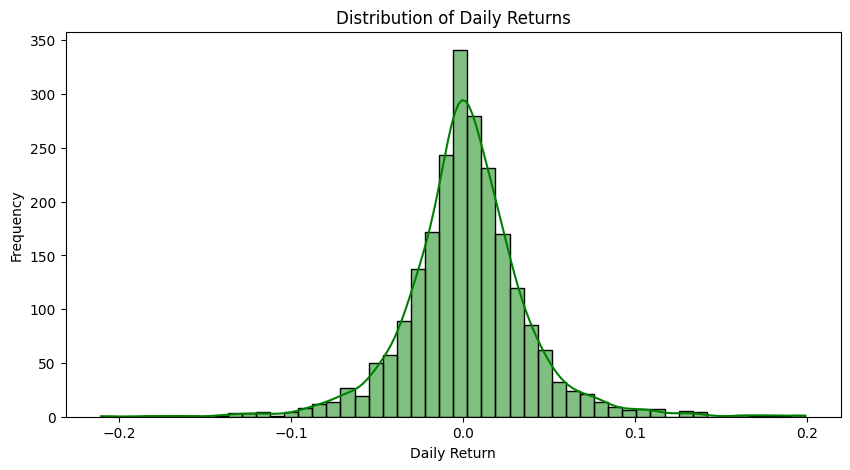

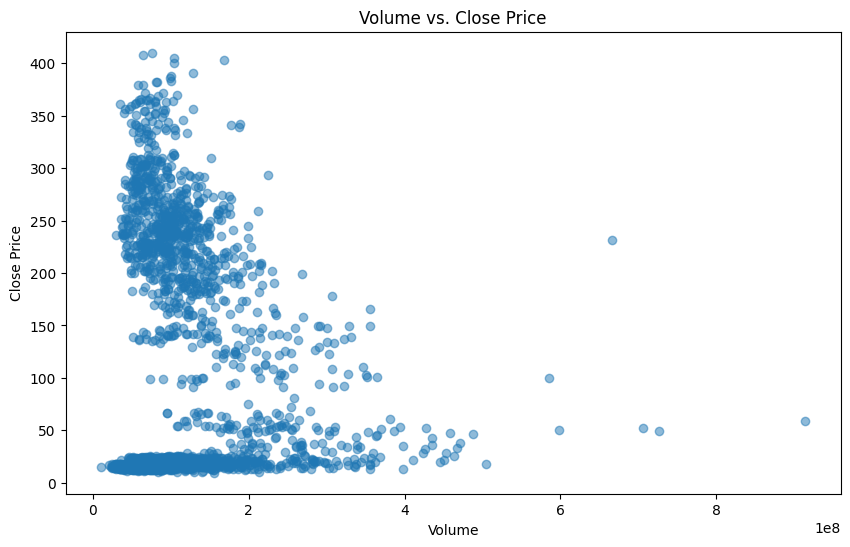

Cleaned data exported to Tesla_Stock_Cleaned.csv
C:\Users\PC\Documents\DataAnalysisWorkPython


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r'C:\Users\PC\OneDrive\Documents\Data Analytics Work\Tasla_Stock_Updated_V2.csv')
display(df.head())

df.info()

print('Missing values per column:')
print(df.isnull().sum())
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

print(df.describe())
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()
plt.figure(figsize=(12, 4))
plt.plot(df['Volume'], color='orange')
plt.title('Tesla Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates()
print('Missing values per column after cleaning:')
print(df.isnull().sum())
df = df.dropna()
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Daily_Return'] = df['Close'].pct_change()
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(df['Volume'], bins=50, kde=True, color='orange')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Price Columns')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close', alpha=0.5)
plt.plot(df['MA_7'], label='7-Day MA')
plt.plot(df['MA_30'], label='30-Day MA')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

df.to_csv('Tesla_Stock_Cleaned.csv')
print('Cleaned data exported to Tesla_Stock_Cleaned.csv')

import os
print(os.getcwd())
